In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


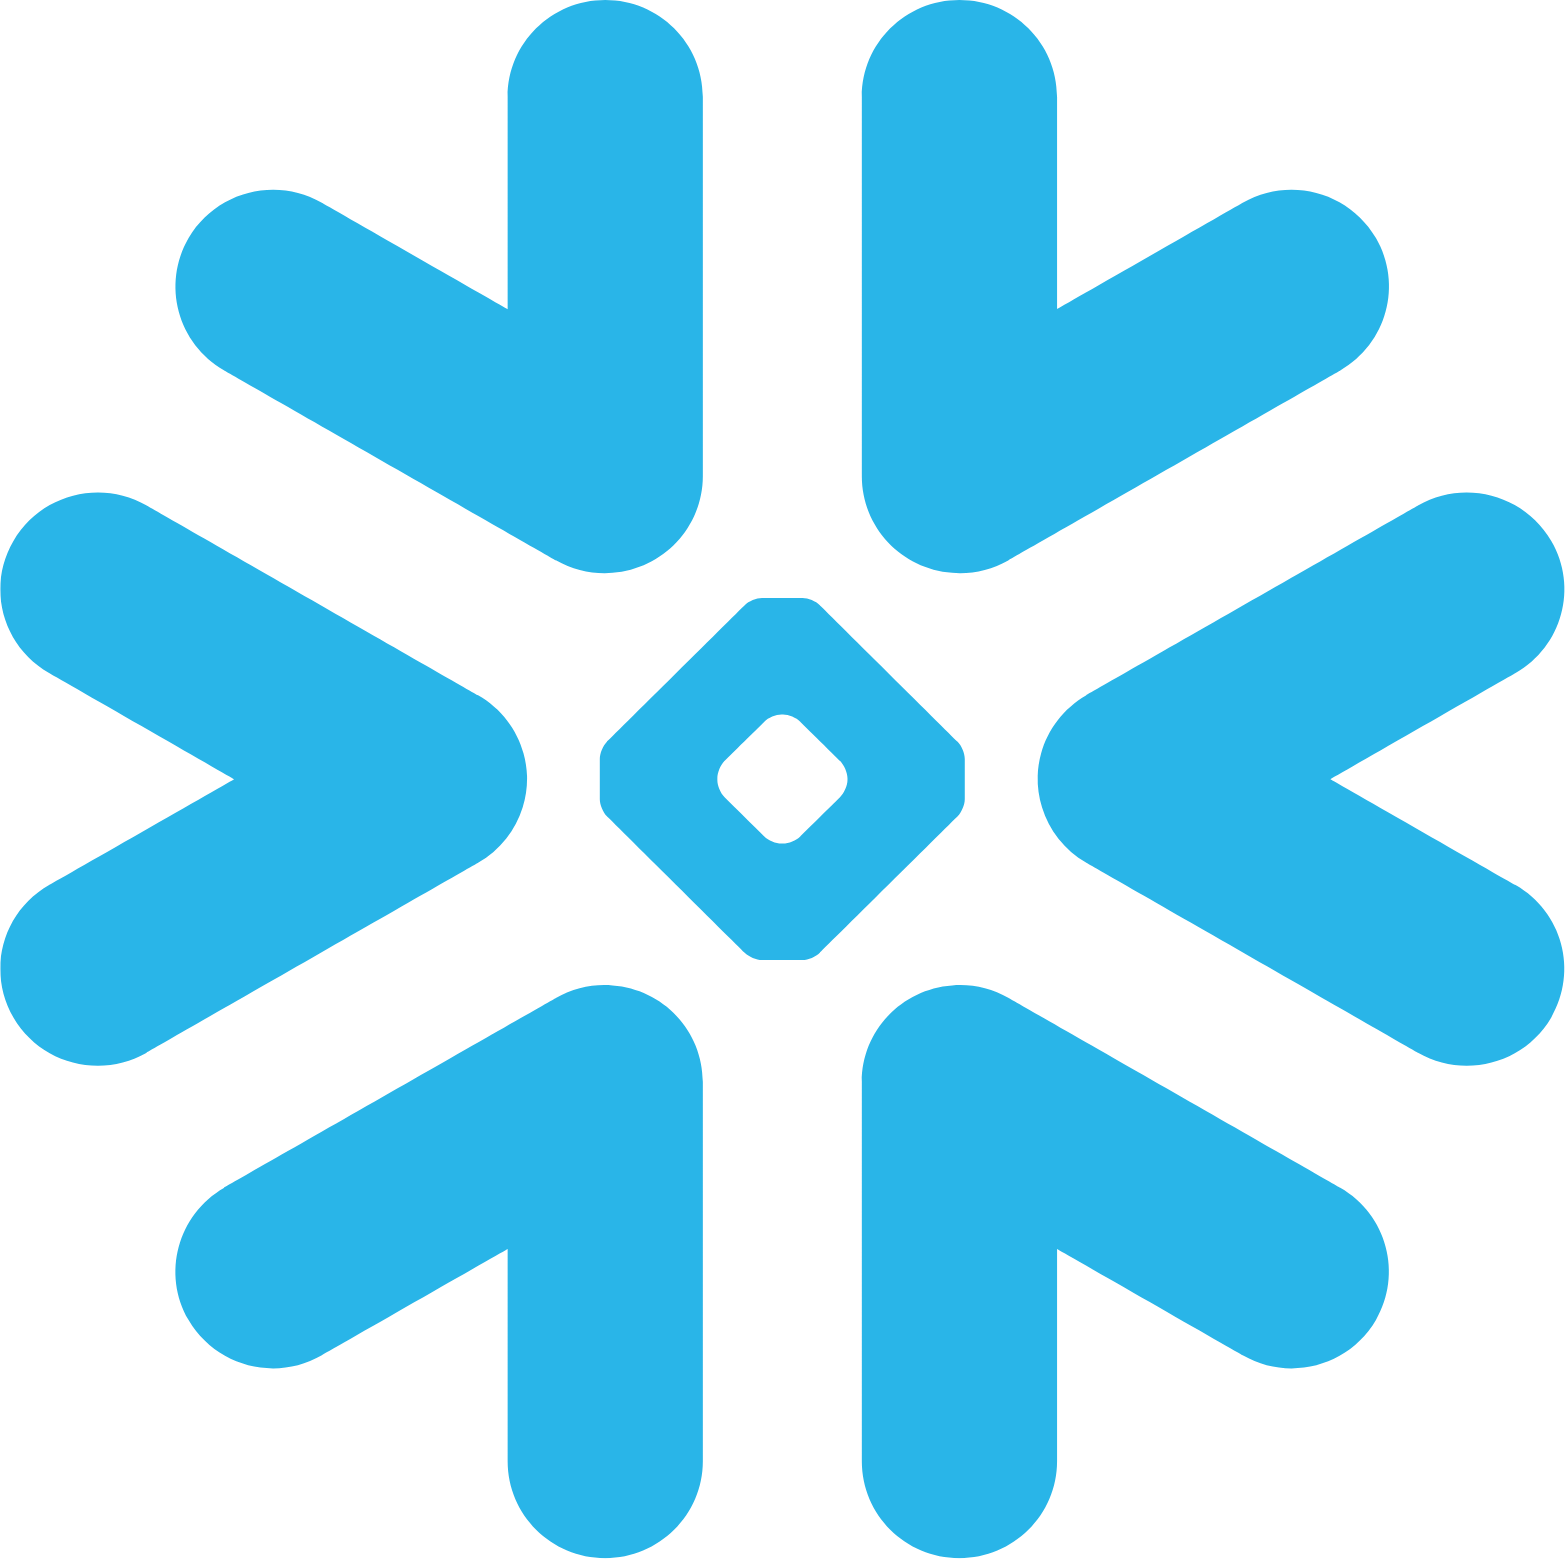

In [48]:
use_mito = True
df = pd.read_csv("combined.csv")
df.head(10)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   is_room_shared              51707 non-null  bool   
 4   is_room_private             51707 non-null  bool   
 5   person_capacity             51707 non-null  int64  
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  int64  
 10  guest_satisfaction_overall  51707 non-null  int64  
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [36]:
df['ID'] = df['ID'].astype('object')

In [39]:
df.isna().sum()

ID                            0
realSum                       0
room_type                     0
is_room_shared                0
is_room_private               0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
day_type                      0
country                       0
dtype: int64


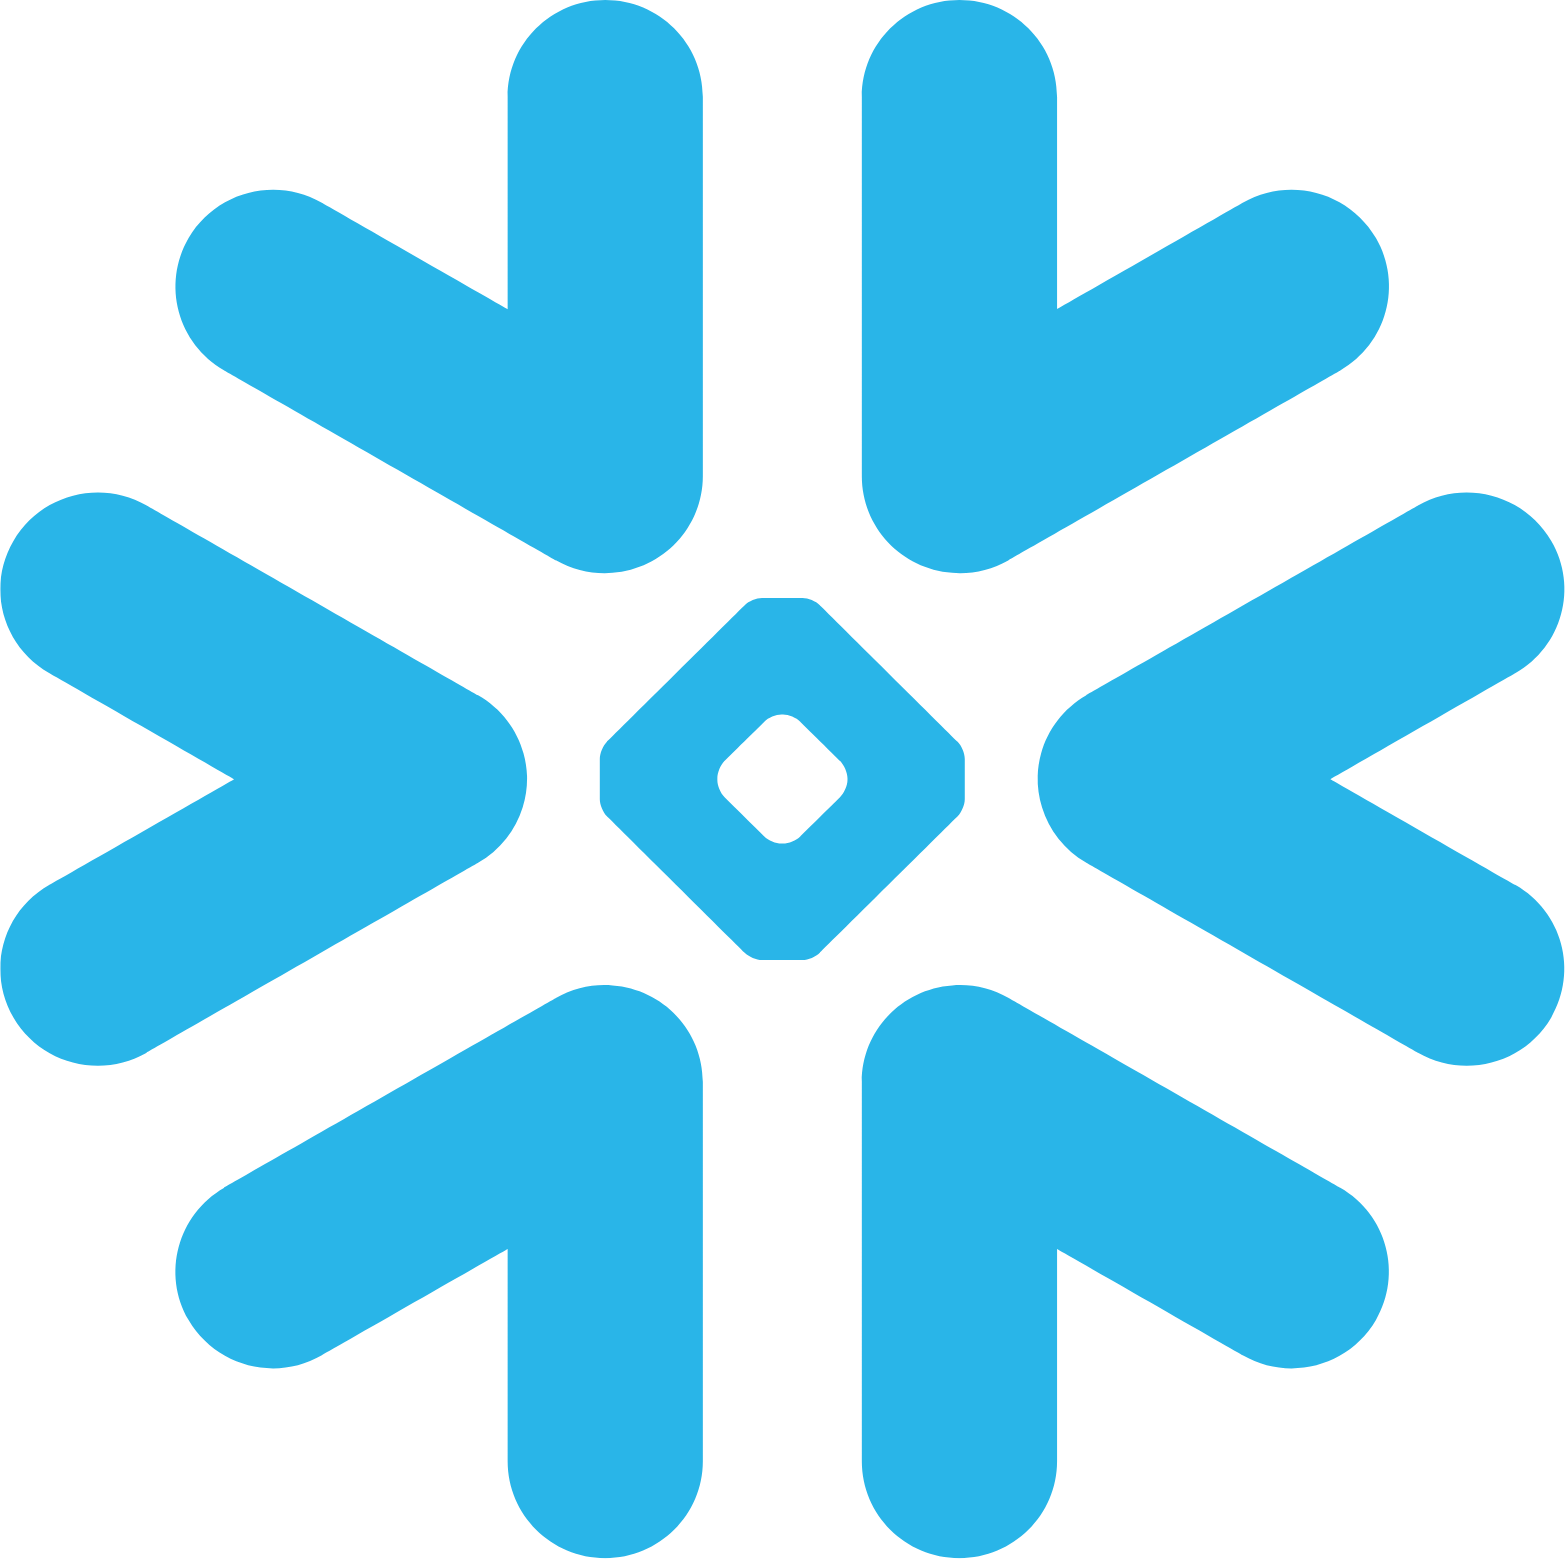

In [40]:
df.describe()

In [41]:
import pandas as pd

# Assume your DataFrame is called df
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", list(categorical_cols))
print("Numerical columns:", numerical_cols)


Categorical columns: ['ID', 'room_type', 'city', 'day_type', 'country']
Numerical columns: Index(['realSum', 'person_capacity', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng',
       'lat'],
      dtype='object')


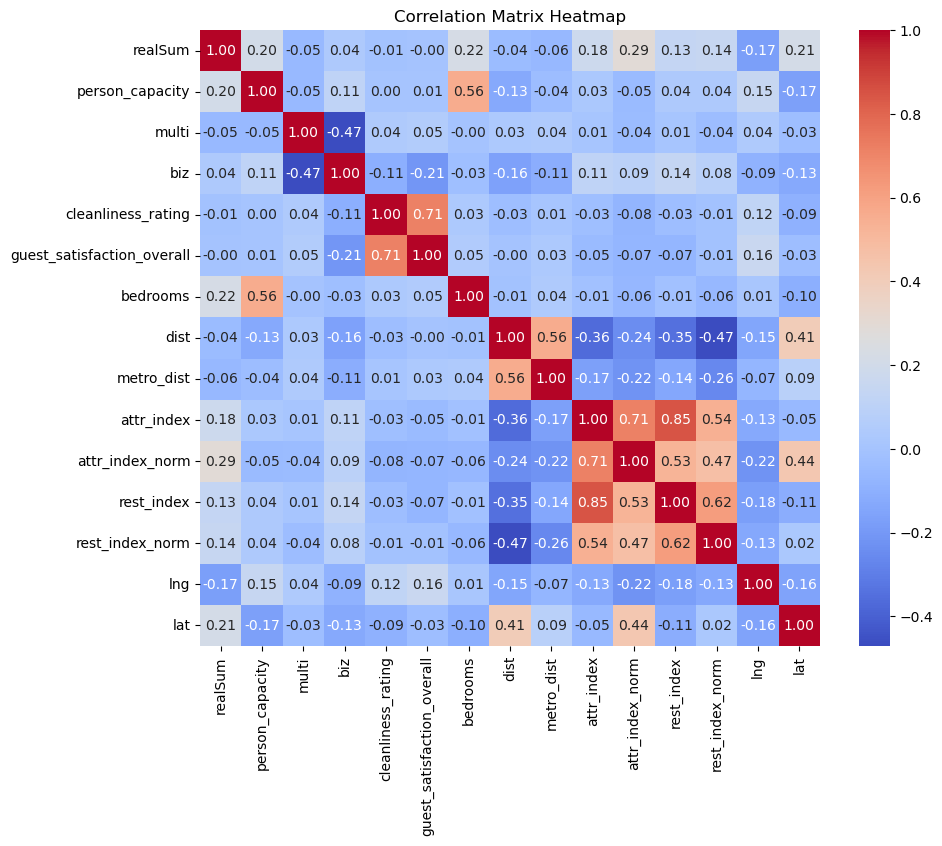

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns from df
numerical_df = df[numerical_cols]

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
df = pd.read_csv("ODC_Airbnb.csv")
df.head(10)

ID      realSum        room_type  room_shared  room_private  \
0   0   194.033698     Private room        False          True   
1   1   344.245776     Private room        False          True   
2   2   264.101422     Private room        False          True   
3   3   433.529398     Private room        False          True   
4   4   485.552926     Private room        False          True   
5   5   552.808567     Private room        False          True   
6   6   215.124317     Private room        False          True   
7   7  2771.307384  Entire home/apt        False         False   
8   8  1001.804420  Entire home/apt        False         False   
9   9   276.521454     Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                2              False      1    0                  10   
1                4              False      0    0                   8   
2                2              False      0    1                   9   
3                4              False      0    1                   9   
4                2               True      0    0                  10   
5                3              False      0    0                   8   
6                2              False      0    0                  10   
7                4               True      0    0                  10   
8                4              False      0    0                   9   
9                2              False      1    0                  10   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                          93         1  5.022964    2.539380   78.690379   
1                          85         1  0.488389    0.239404  631.176378   
2                          87         1  5.748312    3.651621   75.275877   
3                          90         2  0.384862    0.439876  493.272534   
4                          98         1  0.544738    0.318693  552.830324   
5                         100         2  2.131420    1.904668  174.788957   
6                          94         1  1.881092    0.729747  200.167652   
7                         100         3  1.686807    1.458404  208.808109   
8                          96         2  3.719141    1.196112  106.226456   
9                          88         1  3.142361    0.924404  206.252861   

   attr_index_norm  rest_index  rest_index_norm      lng       lat       city  \
0         4.166708   98.253896         6.846473  4.90569  52.41772  amsterdam   
1        33.421209  837.280757        58.342928  4.90005  52.37432  amsterdam   
2         3.985908   95.386955         6.646700  4.97512  52.36103  amsterdam   
3        26.119108  875.033098        60.973565  4.89417  52.37663  amsterdam   
4        29.272733  815.305740        56.811677  4.90051  52.37508  amsterdam   
5         9.255191  225.201662        15.692376  4.87699  52.38966  amsterdam   
6        10.599010  242.765524        16.916251  4.91570  52.38296  amsterdam   
7        11.056528  272.313823        18.975219  4.88467  52.38749  amsterdam   
8         5.624761  133.876202         9.328686  4.86459  52.40175  amsterdam   
9        10.921226  238.291258        16.604478  4.87600  52.34700  amsterdam   

   day_type      Country  Cost of Living Index  Rent Index  \
0  weekdays  Netherlands                  82.6        60.0   
1  weekdays  Netherlands                  82.6        60.0   
2  weekdays  Netherlands                  82.6        60.0   
3  weekdays  Netherlands                  82.6        60.0   
4  weekdays  Netherlands                  82.6        60.0   
5  weekdays  Netherlands                  82.6        60.0   
6  weekdays  Netherlands                  82.6        60.0   
7  weekdays  Netherlands                  82.6        60.0   
8  weekdays  Netherlands                  82.6        60.0   
9  weekdays  Netherlands                  82.6        60.0   

   Cost of Living Plus Rent Index  Groceries Inde

In [ ]:
df.head()

ID     realSum     room_type  room_shared  room_private  person_capacity  \
0   0  194.033698  Private room        False          True                2   
1   1  344.245776  Private room        False          True                4   
2   2  264.101422  Private room        False          True                2   
3   3  433.529398  Private room        False          True                4   
4   4  485.552926  Private room        False          True                2   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                  10   
1              False      0    0                   8   
2              False      0    1                   9   
3              False      0    1                   9   
4               True      0    0                  10   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                          93         1  5.022964    2.539380   78.690379   
1                          85         1  0.488389    0.239404  631.176378   
2                          87         1  5.748312    3.651621   75.275877   
3                          90         2  0.384862    0.439876  493.272534   
4                          98         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat       city  \
0         4.166708   98.253896         6.846473  4.90569  52.41772  amsterdam   
1        33.421209  837.280757        58.342928  4.90005  52.37432  amsterdam   
2         3.985908   95.386955         6.646700  4.97512  52.36103  amsterdam   
3        26.119108  875.033098        60.973565  4.89417  52.37663  amsterdam   
4        29.272733  815.305740        56.811677  4.90051  52.37508  amsterdam   

   day_type      Country  Cost of Living Index  Rent Index  \
0  weekdays  Netherlands                  82.6        60.0   
1  weekdays  Netherlands                  82.6        60.0   
2  weekdays  Netherlands                  82.6        60.0   
3  weekdays  Netherlands                  82.6        60.0   
4  weekdays  Netherlands                  82.6        60.0   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                            72.5             71.5                    91.8   
1                            72.5             71.5                    91.8   
2                            72.5             71.5                    91.8   
3                            72.5             71.5                    91.8   
4                            72.5             71.5                    91.8   

   Local Purchasing Power Index  Quality of Life Index  \
0                         129.9                  208.1   
1                         129.9                  208.1   
2                         129.9                  208.1   
3                         129.9                  208.1   
4                         129.9                  208.1   

   Purchasing Power Index  Safety Index  Health Care Index  \
0                   153.3          69.9               75.0   
1                   153.3          69.9               75.0   
2                   153.3          69.9               75.0   
3                   153.3          69.9               75.0   
4                   153.3          69.9               75.0   

   Property Price to Income Ratio  Traffic Commute Time Index  \
0                             8.8                        23.4   
1                             8.8                        23.4   
2                             8.8                        23.4   
3                             8.8                        23.4   
4                             8.8                        23.4   

   Pollution Index  Climate Index  
0             27.6           87.5  
1             27.6           87.5  
2             27.6           87.5  
3             27.6           87.5  
4             27.6           87.5

In [ ]:
df.tail()

ID     realSum        room_type  room_shared  room_private  \
51702  1794  715.938574  Entire home/apt        False         False   
51703  1795  304.793960  Entire home/apt        False         False   
51704  1796  637.168969  Entire home/apt        False         False   
51705  1797  301.054157     Private room        False          True   
51706  1798  133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
51702                6              False      0    1                  10   
51703                2              False      0    0                   8   
51704                2              False      0    0                  10   
51705                2              False      0    0                  10   
51706                4               True      1    0                  10   

       guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
51702                         100         3  0.530181    0.135447  219.402478   
51703                          86         1  0.810205    0.100839  204.970121   
51704                          93         1  0.994051    0.202539  169.073402   
51705                          87         1  3.044100    0.287435  109.236574   
51706                          93         1  1.263932    0.480903  150.450381   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  \
51702        15.712158  438.756874        10.604584  16.37940  48.21136   
51703        14.678608  342.182813         8.270427  16.38070  48.20296   
51704        12.107921  282.296425         6.822996  16.38568  48.20460   
51705         7.822803  158.563398         3.832416  16.34100  48.19200   
51706        10.774264  225.247293         5.444140  16.39066  48.20811   

         city  day_type  Country  Cost of Living Index  Rent Index  \
51702  vienna  weekends  Austria                  73.9        29.6   
51703  vienna  weekends  Austria                  73.9        29.6   
51704  vienna  weekends  Austria                  73.9        29.6   
51705  vienna  weekends  Austria                  73.9        29.6   
51706  vienna  weekends  Austria                  73.9        29.6   

       Cost of Living Plus Rent Index  Groceries Index  \
51702                            54.2             74.0   
51703                            54.2             74.0   
51704                            54.2             74.0   
51705                            54.2             74.0   
51706                            54.2             74.0   

       Restaurant Price Index  Local Purchasing Power Index  \
51702                    75.0                         133.5   
51703                    75.0                         133.5   
51704                    75.0                         133.5   
51705                    75.0                         133.5   
51706                    75.0                         133.5   

       Quality of Life Index  Purchasing Power Index  Safety Index  \
51702                  199.8                   123.2          71.5   
51703                  199.8                   123.2          71.5   
51704                  199.8                   123.2          71.5   
51705                  199.8                   123.2          71.5   
51706                  199.8                   123.2          71.5   

       Health Care Index  Property Price to Income Ratio  \
51702               78.9                             9.9   
51703               78.9                             9.9   
51704               78.9                             9.9   
51705               78.9                             9.9   
51706               78.9                             9.9   

       Traffic Commute Time Index  Pollution Index  Climate Index  
51702                        23.2             20.4           76.6  
51703                        23.2             20.4           76.6  
51704                        23.2             

In [ ]:
df.isna().sum()

ID                                0
realSum                           0
room_type                         0
room_shared                       0
room_private                      0
person_capacity                   0
host_is_superhost                 0
multi                             0
biz                               0
cleanliness_rating                0
guest_satisfaction_overall        0
bedrooms                          0
dist                              0
metro_dist                        0
attr_index                        0
attr_index_norm                   0
rest_index                        0
rest_index_norm                   0
lng                               0
lat                               0
city                              0
day_type                          0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
Quality of Life Index             0
Purchasing Power Index            0
Safety Index                      0
Health Care Index                 0
Property Price to Income Ratio    0
Traffic Commute Time Index        0
Pollution Index                   0
Climate Index                     0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              51707 non-null  int64  
 1   realSum                         51707 non-null  float64
 2   room_type                       51707 non-null  object 
 3   room_shared                     51707 non-null  bool   
 4   room_private                    51707 non-null  bool   
 5   person_capacity                 51707 non-null  int64  
 6   host_is_superhost               51707 non-null  bool   
 7   multi                           51707 non-null  int64  
 8   biz                             51707 non-null  int64  
 9   cleanliness_rating              51707 non-null  int64  
 10  guest_satisfaction_overall      51707 non-null  int64  
 11  bedrooms                        51707 non-null  int64  
 12  dist                            

In [ ]:
df.describe()

ID       realSum  person_capacity         multi  \
count  51707.000000  51707.000000     51707.000000  51707.000000   
mean    1620.502388    279.879591         3.161661      0.291353   
std     1217.380366    327.948386         1.298545      0.454390   
min        0.000000     34.779339         2.000000      0.000000   
25%      646.000000    148.752174         2.000000      0.000000   
50%     1334.000000    211.343089         3.000000      0.000000   
75%     2382.000000    319.694286         4.000000      1.000000   
max     5378.000000  18545.450280         6.000000      1.000000   

                biz  cleanliness_rating  guest_satisfaction_overall  \
count  51707.000000        51707.000000                51707.000000   
mean       0.350204            9.390624                   92.628232   
std        0.477038            0.954868                    8.945531   
min        0.000000            2.000000                   20.000000   
25%        0.000000            9.000000                   90.000000   
50%        0.000000           10.000000                   95.000000   
75%        1.000000           10.000000                   99.000000   
max        1.000000           10.000000                  100.000000   

          bedrooms          dist    metro_dist    attr_index  attr_index_norm  \
count  51707.00000  51707.000000  51707.000000  51707.000000     51707.000000   
mean       1.15876      3.191285      0.681540    294.204105        13.423792   
std        0.62741      2.393803      0.858023    224.754123         9.807985   
min        0.00000      0.015045      0.002301     15.152201         0.926301   
25%        1.00000      1.453142      0.248480    136.797385         6.380926   
50%        1.00000      2.613538      0.413269    234.331748        11.468305   
75%        1.00000      4.263077      0.737840    385.756381        17.415082   
max       10.00000     25.284557     14.273577   4513.563486       100.000000   

         rest_index  rest_index_norm           lng           lat  \
count  51707.000000     51707.000000  51707.000000  51707.000000   
mean     626.856696        22.786177      7.426068     45.671128   
std      497.920226        17.804096      9.799725      5.249263   
min       19.576924         0.592757     -9.226340     37.953000   
25%      250.854114         8.751480     -0.072500     41.399510   
50%      522.052783        17.542238      4.873000     47.506690   
75%      832.628988        32.964603     13.518825     51.471885   
max     6696.156772       100.000000     23.786020     52.641410   

       Cost of Living Index    Rent Index  Cost of Living Plus Rent Index  \
count          51707.000000  51707.000000                    51707.000000   
mean              69.057435     41.156478                       56.597503   
std               12.643144     16.848879                       13.949148   
min               51.100000     18.200000                       37.300000   
25%               57.900000     34.900000                       47.200000   
50%               63.400000     36.200000                       50.700000   
75%               78.600000     43.500000                       62.900000   
max               87.500000     70.100000                       79.700000   

       Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
count     51707.000000            51707.000000                  51707.000000   
mean         63.683236               70.007684                     98.454993   
std           9.610819               13.249323                     24.372133   
min          47.800000               50.500000                     60.900000   
25%          55.100000               62.900000                     84.300000   
50%          64.900000               63.800000                     95.100000   
75%          68.900000               75.200000                    118.000000   
max          77.900000               91.800000                    133.500000   

      

outliers in the realSum which represents the price of Airbnb.(right skewness) (Std, max).

outliers in distance from city center (right skewness) (Std, max).


outliers in metro distance the same as city center (right skewness) (Std > mean, max).


IQR=Q3−Q1

Upper=Q3+1.5×IQR

Lower=Q1−1.5×IQR

In [ ]:
# Realsum
Q1 = df['realSum'].quantile(0.25)
Q3 = df['realSum'].quantile(0.75)
IQR = Q3 - Q1

outliers_realsum = df[(df['realSum'] < Q1 - 1.5*IQR) | (df['realSum'] > Q3 + 1.5*IQR)]



In [ ]:
# distance
Q1 = df['dist'].quantile(0.25)
Q3 = df['dist'].quantile(0.75)
IQR = Q3 - Q1
Upper = Q3 + 1.5 * IQR
Lower = Q1 - 1.5 * IQR

dist_Outlier = df[df['dist'] > Upper]
dist_Outlier.head()

df['dist'] = df['dist'].apply(lambda x: Upper if x > Upper else (Lower if x < Lower else x))

In [ ]:
# metro_dist
Q1 = df['metro_dist'].quantile(0.25)
Q3 = df['metro_dist'].quantile(0.75)
IQR = Q3 - Q1
Upper = Q3 + 1.5 * IQR
Lower = Q1 - 1.5 * IQR

metro_dist_Outlier = df[df['metro_dist'] > Upper]
metro_dist_Outlier.head()

df['metro_dist'] = df['metro_dist'].apply(lambda x: Upper if x > Upper else (Lower if x < Lower else x))

In [ ]:
df.describe(include="O")

room_type    city  day_type         Country
count             51707   51707     51707           51707
unique                3      10         2              10
top     Entire home/apt  london  weekends  United Kingdom
freq              32648    9993     26207            9993

In [ ]:
df.columns

Index(['ID', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'city', 'day_type', 'Country',
       'Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index', 'Quality of Life Index',
       'Purchasing Power Index', 'Safety Index', 'Health Care Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index'],
      dtype='object')

#Feature Engineering

In [ ]:
df['metro_dist'].median()

0.413269243

In [ ]:
df['near_metro'] = (df['metro_dist'] <= 0.413269243).astype(int)


In [ ]:
df['price_per_person'] = df['realSum'] / df['person_capacity']


In [ ]:
df.groupby('person_capacity')['price_per_person'].mean()


person_capacity
2    113.853802
3     80.334686
4     80.207612
5     68.157849
6     76.169558
Name: price_per_person, dtype: float64

In [ ]:
df['superhost_premium'] = df['host_is_superhost'].astype(int)

In [ ]:
df.groupby('superhost_premium')['realSum'].mean()


superhost_premium
0    288.625905
1    254.447726
Name: realSum, dtype: float64

In [ ]:
df['cleanliness_score'] = df['cleanliness_rating'] / df['cleanliness_rating'].max()

In [ ]:
df['living_adjusted_price'] = df['realSum'] / df['Cost of Living Index']

In [ ]:
df.head()

ID     realSum     room_type  room_shared  room_private  person_capacity  \
0   0  194.033698  Private room        False          True                2   
1   1  344.245776  Private room        False          True                4   
2   2  264.101422  Private room        False          True                2   
3   3  433.529398  Private room        False          True                4   
4   4  485.552926  Private room        False          True                2   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                  10   
1              False      0    0                   8   
2              False      0    1                   9   
3              False      0    1                   9   
4               True      0    0                  10   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                          93         1  5.022964    1.471881   78.690379   
1                          85         1  0.488389    0.239404  631.176378   
2                          87         1  5.748312    1.471881   75.275877   
3                          90         2  0.384862    0.439876  493.272534   
4                          98         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat       city  \
0         4.166708   98.253896         6.846473  4.90569  52.41772  amsterdam   
1        33.421209  837.280757        58.342928  4.90005  52.37432  amsterdam   
2         3.985908   95.386955         6.646700  4.97512  52.36103  amsterdam   
3        26.119108  875.033098        60.973565  4.89417  52.37663  amsterdam   
4        29.272733  815.305740        56.811677  4.90051  52.37508  amsterdam   

   day_type      Country  Cost of Living Index  Rent Index  \
0  weekdays  Netherlands                  82.6        60.0   
1  weekdays  Netherlands                  82.6        60.0   
2  weekdays  Netherlands                  82.6        60.0   
3  weekdays  Netherlands                  82.6        60.0   
4  weekdays  Netherlands                  82.6        60.0   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                            72.5             71.5                    91.8   
1                            72.5             71.5                    91.8   
2                            72.5             71.5                    91.8   
3                            72.5             71.5                    91.8   
4                            72.5             71.5                    91.8   

   Local Purchasing Power Index  Quality of Life Index  \
0                         129.9                  208.1   
1                         129.9                  208.1   
2                         129.9                  208.1   
3                         129.9                  208.1   
4                         129.9                  208.1   

   Purchasing Power Index  Safety Index  Health Care Index  \
0                   153.3          69.9               75.0   
1                   153.3          69.9               75.0   
2                   153.3          69.9               75.0   
3                   153.3          69.9               75.0   
4                   153.3          69.9               75.0   

   Property Price to Income Ratio  Traffic Commute Time Index  \
0                             8.8                        23.4   
1                             8.8                        23.4   
2                             8.8                        23.4   
3                             8.8                        23.4   
4                             8.8                        23.4   

   Pollution Index  Climate Index  near_metro  price_per_person  \
0             27.6           87.5           0         97.016849   
1             27.6           87.5           1         86.061444   
2             27.6           87.5           0        132.050711   
3             27.6

In [ ]:
df['tourism_score'] = df['attr_index_norm']
df = df.drop(columns=['attr_index_norm'])

In [ ]:
df['restaurant_density'] = df['rest_index_norm']
df = df.drop(columns=['rest_index_norm'])

In [ ]:
df['relative_price'] = df['realSum'] / df['Cost of Living Index']


In [ ]:
df.groupby('city')['relative_price'].mean().sort_values()


city
athens       2.620797
rome         3.239621
vienna       3.269046
budapest     3.454277
berlin       3.494054
london       4.142506
lisbon       4.395027
barcelona    4.962056
paris        4.994038
amsterdam    6.938412
Name: relative_price, dtype: float64

In [ ]:
df.head()

ID     realSum     room_type  room_shared  room_private  person_capacity  \
0   0  194.033698  Private room        False          True                2   
1   1  344.245776  Private room        False          True                4   
2   2  264.101422  Private room        False          True                2   
3   3  433.529398  Private room        False          True                4   
4   4  485.552926  Private room        False          True                2   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                  10   
1              False      0    0                   8   
2              False      0    1                   9   
3              False      0    1                   9   
4               True      0    0                  10   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                          93         1  5.022964    1.471881   78.690379   
1                          85         1  0.488389    0.239404  631.176378   
2                          87         1  5.748312    1.471881   75.275877   
3                          90         2  0.384862    0.439876  493.272534   
4                          98         1  0.544738    0.318693  552.830324   

   rest_index      lng       lat       city  day_type      Country  \
0   98.253896  4.90569  52.41772  amsterdam  weekdays  Netherlands   
1  837.280757  4.90005  52.37432  amsterdam  weekdays  Netherlands   
2   95.386955  4.97512  52.36103  amsterdam  weekdays  Netherlands   
3  875.033098  4.89417  52.37663  amsterdam  weekdays  Netherlands   
4  815.305740  4.90051  52.37508  amsterdam  weekdays  Netherlands   

   Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0                  82.6        60.0                            72.5   
1                  82.6        60.0                            72.5   
2                  82.6        60.0                            72.5   
3                  82.6        60.0                            72.5   
4                  82.6        60.0                            72.5   

   Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
0             71.5                    91.8                         129.9   
1             71.5                    91.8                         129.9   
2             71.5                    91.8                         129.9   
3             71.5                    91.8                         129.9   
4             71.5                    91.8                         129.9   

   Quality of Life Index  Purchasing Power Index  Safety Index  \
0                  208.1                   153.3          69.9   
1                  208.1                   153.3          69.9   
2                  208.1                   153.3          69.9   
3                  208.1                   153.3          69.9   
4                  208.1                   153.3          69.9   

   Health Care Index  Property Price to Income Ratio  \
0               75.0                             8.8   
1               75.0                             8.8   
2               75.0                             8.8   
3               75.0                             8.8   
4               75.0                             8.8   

   Traffic Commute Time Index  Pollution Index  Climate Index  near_metro  \
0                        23.4             27.6           87.5           0   
1                        23.4             27.6           87.5           1   
2                        23.4             27.6           87.5           0   
3                        23.4             27.6           87.5           0   
4                        23.4             27.6           87.5           1   

   price_per_person  superhost_premium  cleanliness_score  \
0         97.016849                  0                1.0   
1         86.061444                  0                0.8   
2        132.050711                  0     

In [ ]:
df['is_weekend'] = (df['day_type'] == 'weekends').astype(int)

#EDA

In [ ]:
outliers_realsum.head()

ID      realSum        room_type  room_shared  room_private  \
7    7  2771.307384  Entire home/apt        False         False   
8    8  1001.804420  Entire home/apt        False         False   
10  10   909.474375  Entire home/apt        False         False   
12  12   675.602840  Entire home/apt        False         False   
21  21   933.845757  Entire home/apt        False         False   

    person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
7                 4               True      0    0                  10   
8                 4              False      0    0                   9   
10                2              False      0    0                  10   
12                4              False      0    0                   8   
21                4              False      0    0                  10   

    guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
7                          100         3  1.686807    1.458404  208.808109   
8                           96         2  3.719141    1.196112  106.226456   
10                          96         1  1.009922    0.917115  409.858124   
12                          87         1  2.933046    0.628073  214.923342   
21                          96         2  1.014066    0.377104  477.794070   

    attr_index_norm  rest_index  rest_index_norm      lng       lat  \
7         11.056528  272.313823        18.975219  4.88467  52.38749   
8          5.624761  133.876202         9.328686  4.86459  52.40175   
10        21.702260  555.114276        38.681161  4.87956  52.36953   
12        11.380334  269.624904        18.787851  4.88934  52.34697   
21        25.299513  664.053251        46.272186  4.89088  52.36422   

         city  day_type      Country  Cost of Living Index  Rent Index  \
7   amsterdam  weekdays  Netherlands                  82.6        60.0   
8   amsterdam  weekdays  Netherlands                  82.6        60.0   
10  amsterdam  weekdays  Netherlands                  82.6        60.0   
12  amsterdam  weekdays  Netherlands                  82.6        60.0   
21  amsterdam  weekdays  Netherlands                  82.6        60.0   

    Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
7                             72.5             71.5                    91.8   
8                             72.5             71.5                    91.8   
10                            72.5             71.5                    91.8   
12                            72.5             71.5                    91.8   
21                            72.5             71.5                    91.8   

    Local Purchasing Power Index  Quality of Life Index  \
7                          129.9                  208.1   
8                          129.9                  208.1   
10                         129.9                  208.1   
12                         129.9                  208.1   
21                         129.9                  208.1   

    Purchasing Power Index  Safety Index  Health Care Index  \
7                    153.3          69.9               75.0   
8                    153.3          69.9               75.0   
10                   153.3          69.9               75.0   
12                   153.3          69.9               75.0   
21                   153.3          69.9               75.0   

    Property Price to Income Ratio  Traffic Commute Time Index  \
7                              8.8                        23.4   
8                              8.8                        23.4   
10                             8.8                        23.4   
12                             8.8                        23.4   
21                             8.8                        23.4   

    Pollution Index  Climate Index  
7              27.6           87.5  
8              27.6           87.5  
10             27.6           87.5  
12             27.6           87.5  
21             27.6     

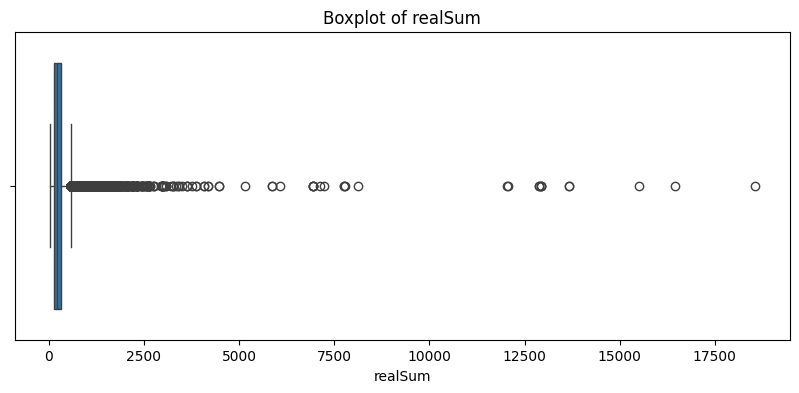

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['realSum'])
plt.title('Boxplot of realSum')
plt.xlabel('realSum')
plt.show()

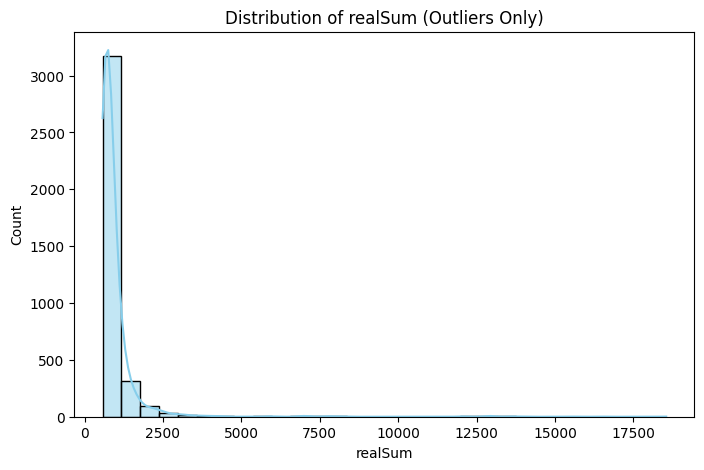

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(outliers_realsum['realSum'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of realSum (Outliers Only)')
plt.xlabel('realSum')
plt.ylabel('Count')
plt.show()

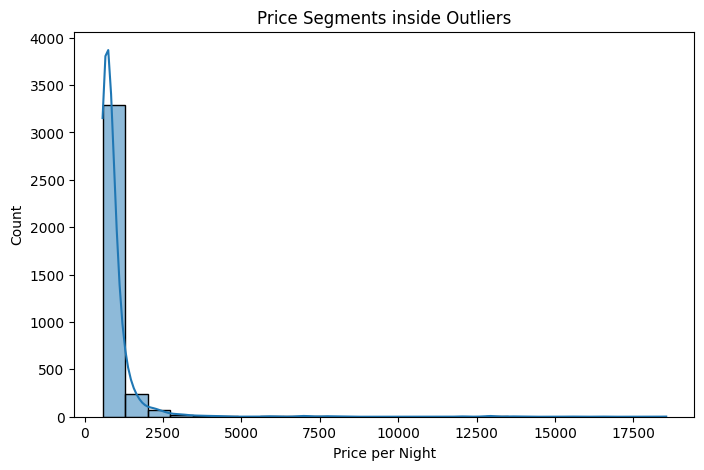

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(outliers_realsum['realSum'], bins=25, kde=True)
plt.title('Price Segments inside Outliers')
plt.xlabel('Price per Night')
plt.show()

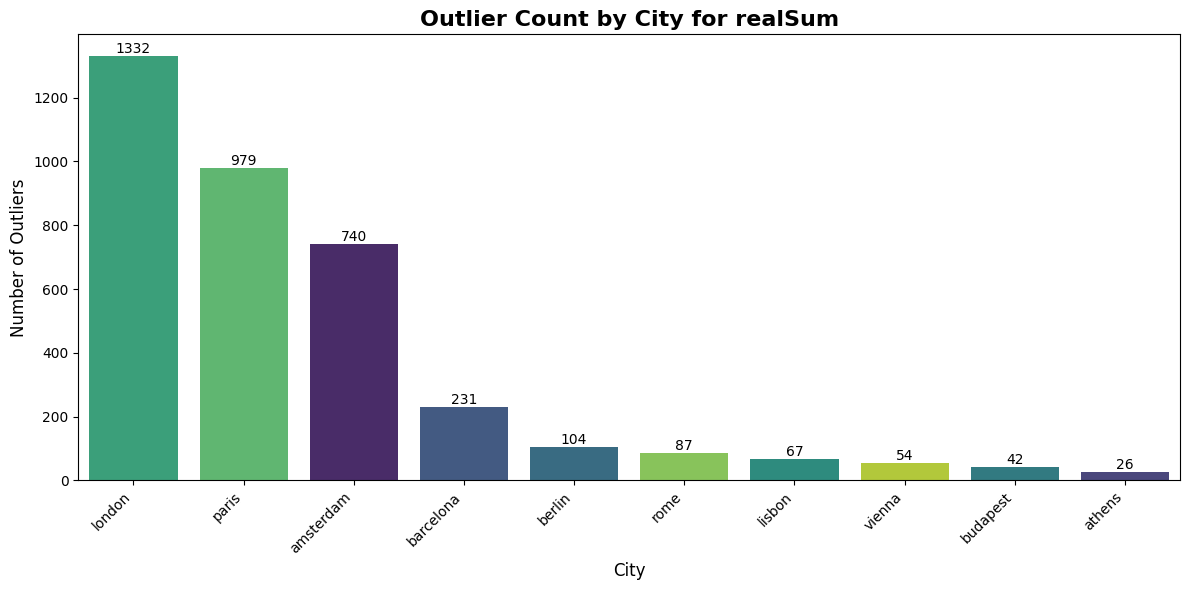

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=outliers_realsum, x='city', hue='city', palette='viridis',
              order=outliers_realsum['city'].value_counts().index, legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Outlier Count by City for realSum', fontsize=16, weight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Outliers', fontsize=12)

# Adding counts on top of the bars
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

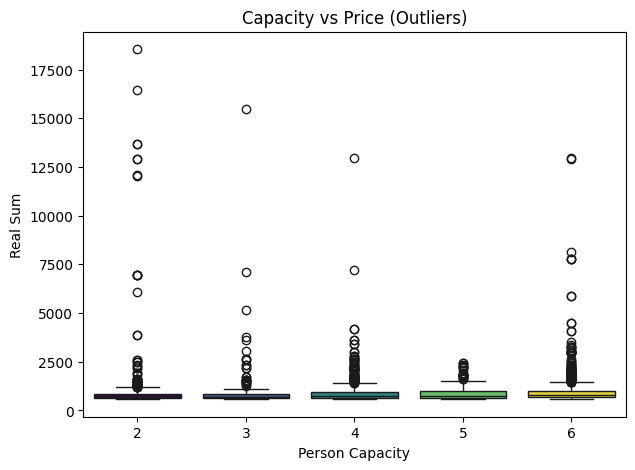

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=outliers_realsum,
            x='person_capacity', y='realSum', hue='person_capacity', palette='viridis', legend=False)
plt.title('Capacity vs Price (Outliers)')
plt.xlabel('Person Capacity')
plt.ylabel('Real Sum')
plt.show()

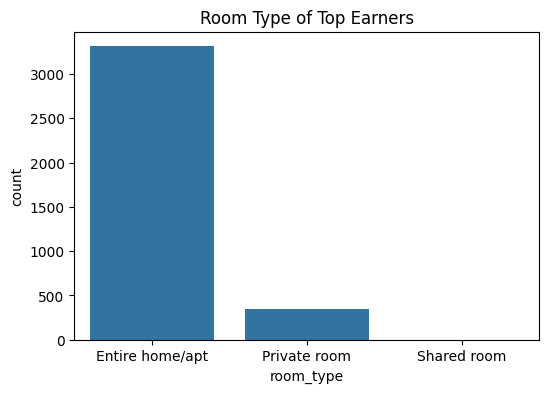

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=outliers_realsum, x='room_type')
plt.title('Room Type of Top Earners')
plt.show()

Do listings at the same location (lat/lng) charge higher prices on weekends compared to weekdays?
We want to aggregate by location within the same country and compare Weekend vs Weekday prices.

In [ ]:
price_loc = df.groupby(['city','is_weekend'])['realSum'].mean().unstack(fill_value=0)

price_loc_melted = price_loc.reset_index().melt(id_vars='city', var_name='day_type', value_name='average_price')
price_loc_melted['day_type'] = price_loc_melted['day_type'].map({0: 'Weekday', 1: 'Weekend'})

price_loc_melted_sorted = price_loc_melted.sort_values(by='average_price', ascending=False)

fig = px.bar(price_loc_melted_sorted,
             x='city',
             y='average_price',
             color='day_type',
             barmode='group',
             title='Average Airbnb Prices: Weekdays vs. Weekends by City (Sorted by Price)',
             labels={'average_price': 'Average Price', 'city': 'City', 'day_type': 'Day Type'})
fig.show()

In [ ]:
price_time = df.groupby('is_weekend')['realSum'].mean().reset_index()

price_time['day_type'] = price_time['is_weekend'].map({
    0: 'Weekday',
    1: 'Weekend'
})

fig = px.bar(
    price_time,
    x='day_type',
    y='realSum',
    title='Average Airbnb Prices: Weekday vs Weekend',
    labels={'realSum': 'Average Price', 'day_type': 'Day Type'}
)

fig.show()


Which cities are the most profitable for Airbnb listings based on average listing price?
How do the top cities compare in terms of revenue potential?

/tmp/ipython-input-2436623923.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




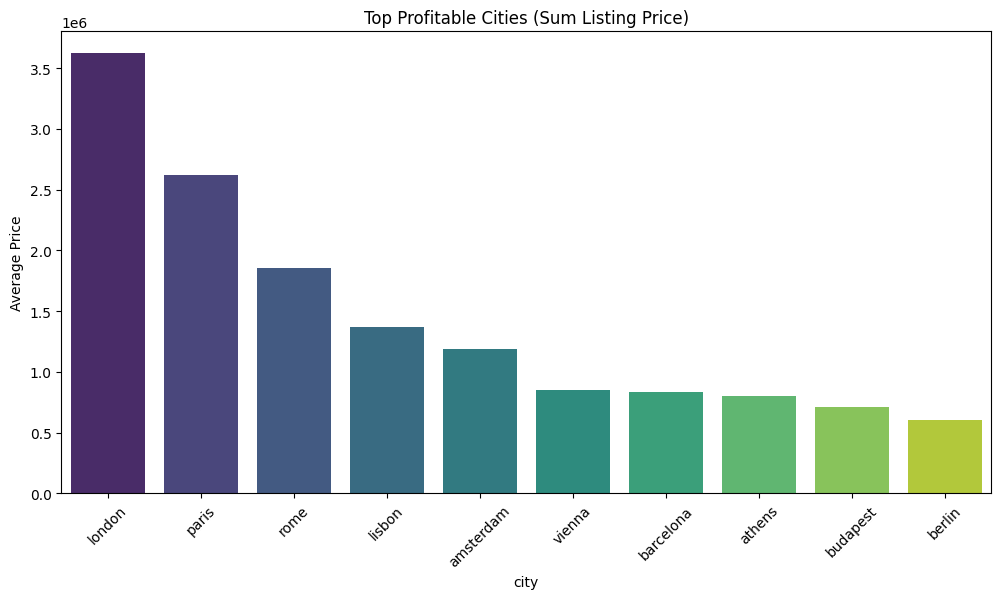

In [ ]:
city_sum = df.groupby('city')['realSum'].sum().sort_values(ascending=False)

top_cities = city_sum.head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.title("Top Profitable Cities (Sum Listing Price)")
plt.show()


Do listings close to the metro earn higher prices than those farther away?
We want to measure if proximity to metro stations impacts average listing price or revenue.

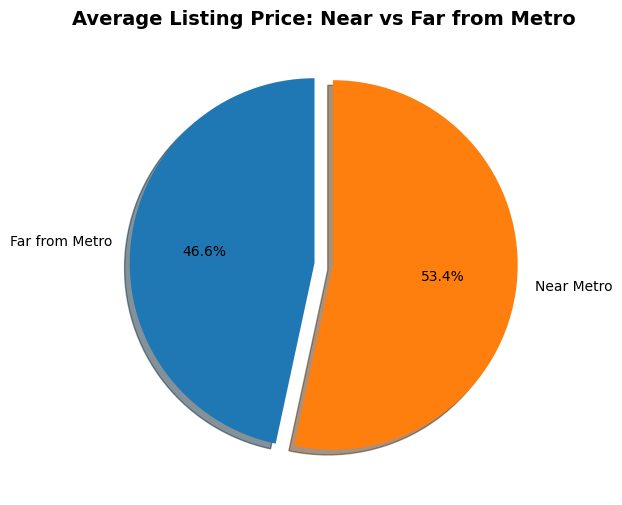

In [ ]:
metro_price = df.groupby('near_metro')['realSum'].mean()

plt.figure(figsize=(6,6))
colors = ['#1f77b4','#ff7f0e']

plt.pie(metro_price.values, labels=['Far from Metro', 'Near Metro'],
        autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05,0.05),
        shadow=True)
plt.title("Average Listing Price: Near vs Far from Metro", fontsize=14, weight='bold')
plt.show()

Do Superhosts earn higher prices for their listings compared to regular hosts?
We want to measure if the Superhost status impacts average listing price or revenue.

/tmp/ipython-input-2815264895.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




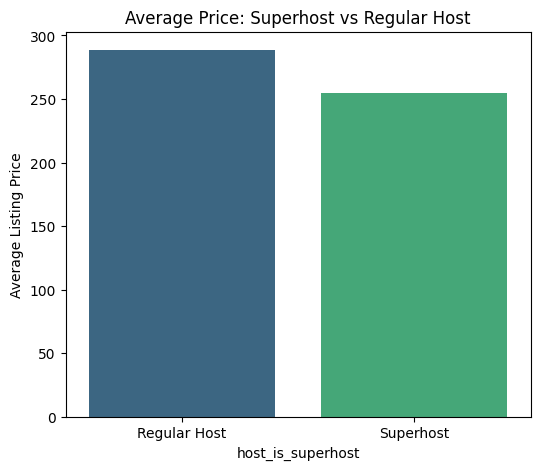

In [ ]:
superhost_price = df.groupby('host_is_superhost')['realSum'].mean()

plt.figure(figsize=(6,5))
sns.barplot(x=superhost_price.index, y=superhost_price.values, palette="viridis")
plt.xticks([0,1], ['Regular Host', 'Superhost'])
plt.ylabel("Average Listing Price")
plt.title("Average Price: Superhost vs Regular Host")
plt.show()

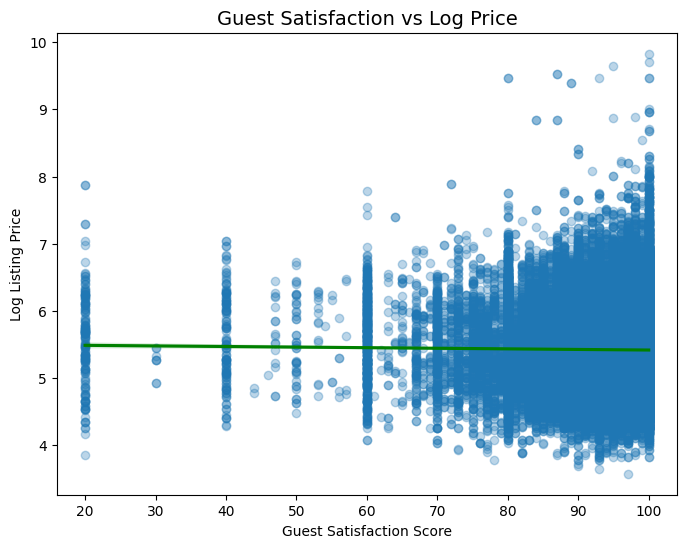

In [ ]:
df['log_price'] = np.log1p(df['realSum'])

plt.figure(figsize=(8,6))

sns.regplot(
    data=df,
    x='guest_satisfaction_overall',
    y='log_price',
    scatter_kws={'alpha':0.3},
    line_kws={'color':'green'}
)

plt.title('Guest Satisfaction vs Log Price', fontsize=14)
plt.xlabel('Guest Satisfaction Score')
plt.ylabel('Log Listing Price')
plt.show()

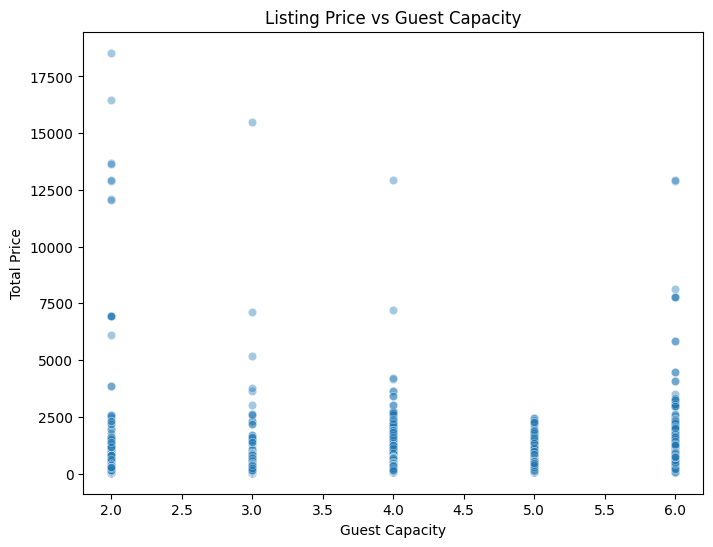

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df,
    x='person_capacity',
    y='realSum',
    alpha=0.4
)

plt.title('Listing Price vs Guest Capacity')
plt.xlabel('Guest Capacity')
plt.ylabel('Total Price')
plt.show()

Countries with higher cost of living tend to have higher Airbnb rental prices.
The positive correlation indicates that general living expenses significantly influence short-term rental pricing.

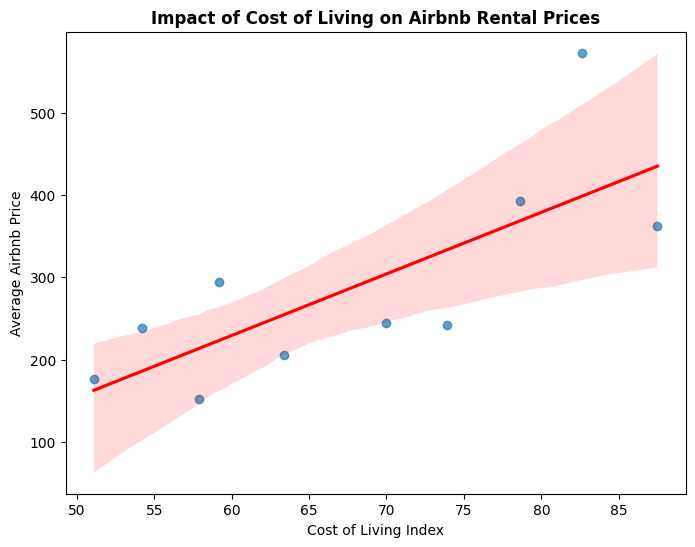

In [ ]:
country_price = (
    df.groupby('Country')
      .agg(
          avg_price=('realSum','mean'),
          cost_of_living=('Cost of Living Index','mean')
      )
      .reset_index()
)

plt.figure(figsize=(8,6))
sns.regplot(
    x='cost_of_living',
    y='avg_price',
    data=country_price,
    scatter_kws={'alpha':0.7},
    line_kws={'color':'red'}
)

plt.xlabel("Cost of Living Index")
plt.ylabel("Average Airbnb Price")
plt.title("Impact of Cost of Living on Airbnb Rental Prices", weight='bold')
plt.show()

Listings located in high-tourism areas command higher prices.
The positive relationship between tourism score and price confirms that proximity to tourist attractions significantly increases rental value.

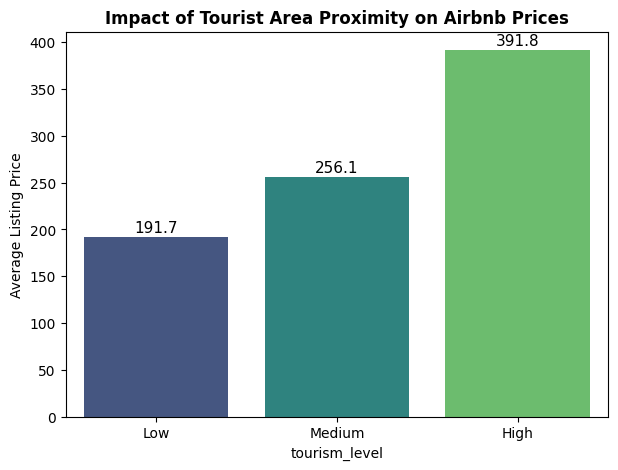

In [ ]:
df['tourism_level'] = pd.qcut(
    df['tourism_score'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

price_by_tourism = df.groupby('tourism_level', observed=False)['realSum'].mean()


plt.figure(figsize=(7,5))
sns.barplot(
    x=price_by_tourism.index,
    y=price_by_tourism.values,
    hue=price_by_tourism.index,
    palette='viridis',
    legend=False
)

plt.ylabel("Average Listing Price")
plt.title("Impact of Tourist Area Proximity on Airbnb Prices", weight='bold')

for i, v in enumerate(price_by_tourism.values):
    plt.text(i, v + 5, f'{v:.1f}', ha='center', fontsize=11)

plt.show()

Listings located in areas with higher restaurant density tend to have higher prices.
Access to dining and lifestyle amenities is a strong attractiveness factor for guests and directly impacts rental value.

/tmp/ipython-input-669422222.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-669422222.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




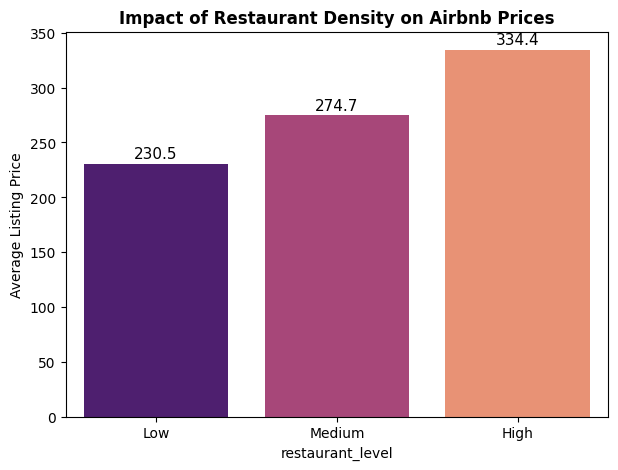

In [ ]:
df['restaurant_level'] = pd.qcut(
    df['restaurant_density'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

price_by_restaurants = df.groupby('restaurant_level')['realSum'].mean()

plt.figure(figsize=(7,5))
sns.barplot(
    x=price_by_restaurants.index,
    y=price_by_restaurants.values,
    palette='magma'
)

plt.ylabel("Average Listing Price")
plt.title("Impact of Restaurant Density on Airbnb Prices", weight='bold')

for i, v in enumerate(price_by_restaurants.values):
    plt.text(i, v + 5, f'{v:.1f}', ha='center', fontsize=11)

plt.show()

Listings located in areas that combine proximity to tourist attractions and high restaurant density are priced significantly higher.
The interaction between tourism appeal and lifestyle amenities creates a strong premium effect on Airbnb prices.

In [ ]:
scaler = MinMaxScaler()

df[['restaurant_norm', 'tourism_norm']] = scaler.fit_transform(
    df[['restaurant_density', 'tourism_score']]
)

In [ ]:
df['lifestyle_tourism_score'] = (
    df['restaurant_norm'] + df['tourism_norm']
) / 2


In [ ]:
df['attractiveness_level'] = pd.qcut(
    df['lifestyle_tourism_score'],
    q=3,
    labels=['Low', 'Medium', 'High']
)


In [ ]:
price_by_attractiveness = df.groupby('attractiveness_level')['realSum'].mean()
price_by_attractiveness


/tmp/ipython-input-3571821516.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



attractiveness_level
Low       203.823559
Medium    276.704415
High      359.110615
Name: realSum, dtype: float64

/tmp/ipython-input-193138424.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




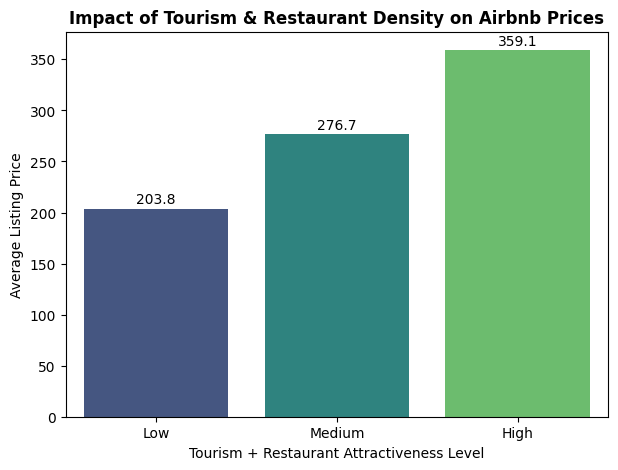

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(
    x=price_by_attractiveness.index,
    y=price_by_attractiveness.values,
    palette='viridis'
)

plt.ylabel("Average Listing Price")
plt.xlabel("Tourism + Restaurant Attractiveness Level")
plt.title("Impact of Tourism & Restaurant Density on Airbnb Prices", weight='bold')

for i, v in enumerate(price_by_attractiveness.values):
    plt.text(i, v + 5, f'{v:.1f}', ha='center')

plt.show()

Countries with higher Quality of Life Index tend to have higher Airbnb prices.
Guests are willing to pay a premium for listings in countries that offer better living conditions, safety, and amenities.

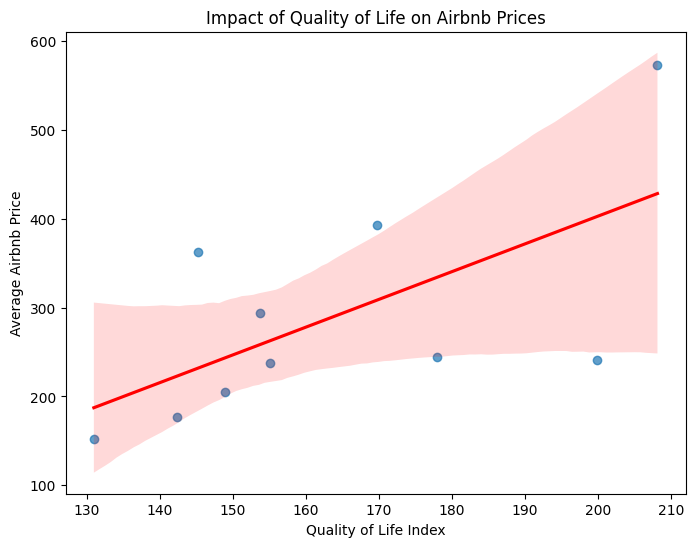

In [ ]:
country_stats = df.groupby('Country').agg(
    avg_price=('realSum','mean'),
    quality_of_life=('Quality of Life Index','mean')
).reset_index()

plt.figure(figsize=(8,6))
sns.regplot(
    x='quality_of_life',
    y='avg_price',
    data=country_stats,
    scatter_kws={'alpha':0.7},
    line_kws={'color':'red'}
)

plt.xlabel("Quality of Life Index")
plt.ylabel("Average Airbnb Price")
plt.title("Impact of Quality of Life on Airbnb Prices")
plt.show()

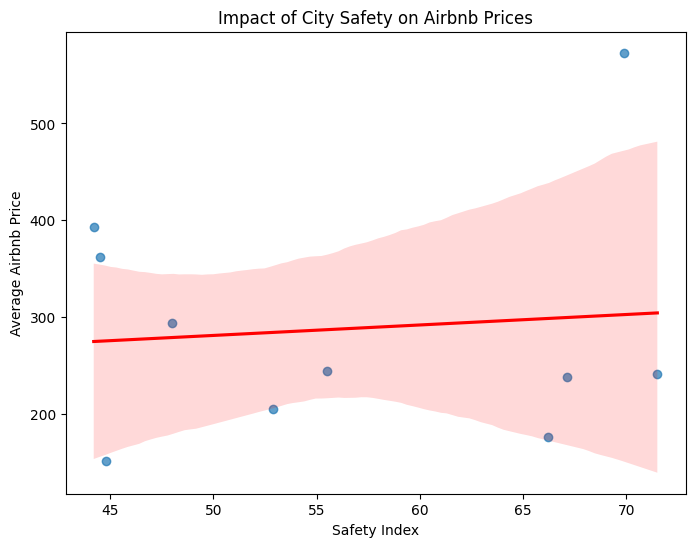

In [ ]:
city_safety = df.groupby('city').agg(
    avg_price=('realSum','mean'),
    safety=('Safety Index','mean')
).reset_index()

plt.figure(figsize=(8,6))
sns.regplot(
    x='safety',
    y='avg_price',
    data=city_safety,
    scatter_kws={'alpha':0.7},
    line_kws={'color':'red'}
)

plt.xlabel("Safety Index")
plt.ylabel("Average Airbnb Price")
plt.title("Impact of City Safety on Airbnb Prices")
plt.show()


Cities with higher Pollution Index tend to have lower Airbnb prices, indicating that guests are sensitive to air quality.
Environmental factors can play a significant role in pricing decisions for short-term rentals.

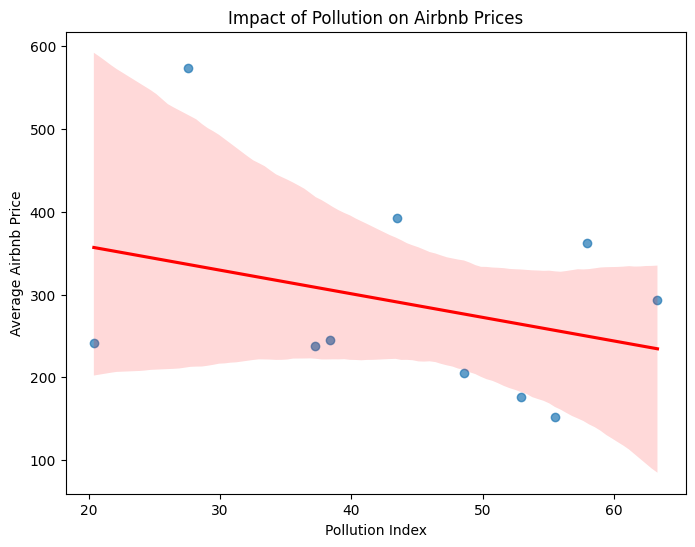

In [ ]:
city_pollution = df.groupby('city').agg(
    avg_price=('realSum','mean'),
    pollution=('Pollution Index','mean')
).reset_index()

plt.figure(figsize=(8,6))
sns.regplot(
    x='pollution',
    y='avg_price',
    data=city_pollution,
    scatter_kws={'alpha':0.7},
    line_kws={'color':'red'}
)

plt.xlabel("Pollution Index")
plt.ylabel("Average Airbnb Price")
plt.title("Impact of Pollution on Airbnb Prices")
plt.show()


Cities with higher Traffic Commute Time Index tend to have slightly lower Airbnb prices, suggesting that guests prefer listings with shorter commute times.
Proximity and accessibility are important factors for rental pricing.

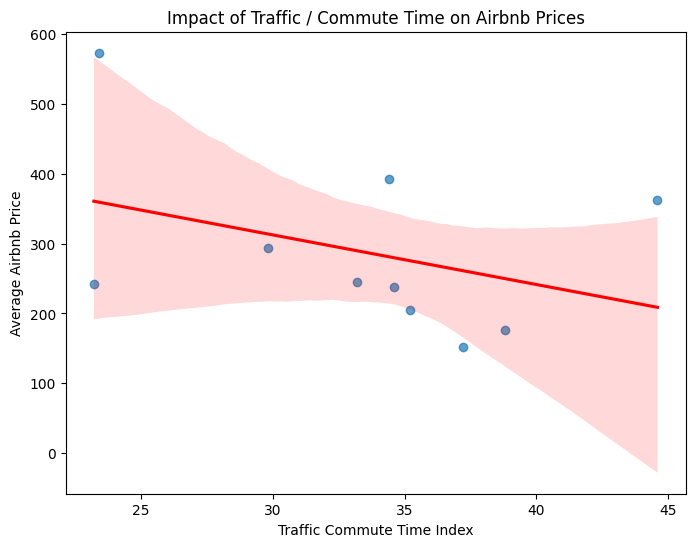

In [ ]:
city_traffic = df.groupby('city').agg(
    avg_price=('realSum','mean'),
    avg_commute=('Traffic Commute Time Index','mean')
).reset_index()

plt.figure(figsize=(8,6))
sns.regplot(
    x='avg_commute',
    y='avg_price',
    data=city_traffic,
    scatter_kws={'alpha':0.7},
    line_kws={'color':'red'}
)

plt.xlabel("Traffic Commute Time Index")
plt.ylabel("Average Airbnb Price")
plt.title("Impact of Traffic / Commute Time on Airbnb Prices")
plt.show()

The best Superhosts are concentrated in countries where guests are willing to pay a premium and provide high satisfaction ratings.
These Superhosts set a benchmark for quality and pricing, showing that professional hosting correlates with higher revenue and happier guests.

/tmp/ipython-input-2739204577.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




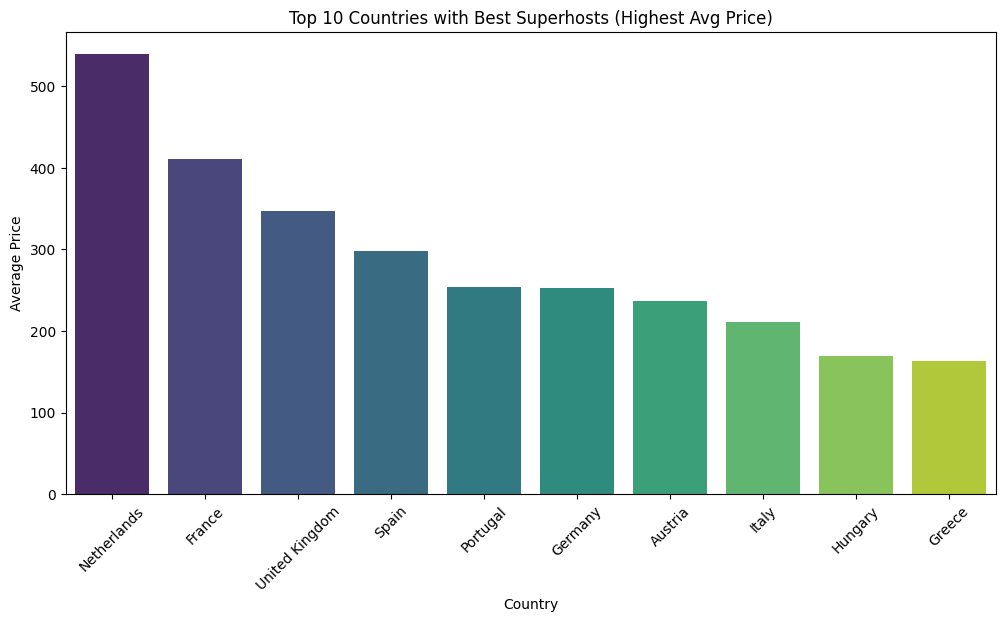

In [ ]:
superhosts = df[df['host_is_superhost'] == True]

best_superhost_price = superhosts.groupby('Country').agg(
    avg_price=('realSum', 'mean')
).sort_values('avg_price', ascending=False)
best_superhost_price.head(10)

top_countries_price = best_superhost_price.head(10)
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_countries_price.index,
    y=top_countries_price['avg_price'],
    palette='viridis'
)
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.title("Top 10 Countries with Best Superhosts (Highest Avg Price)")
plt.show()


/tmp/ipython-input-2429183757.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




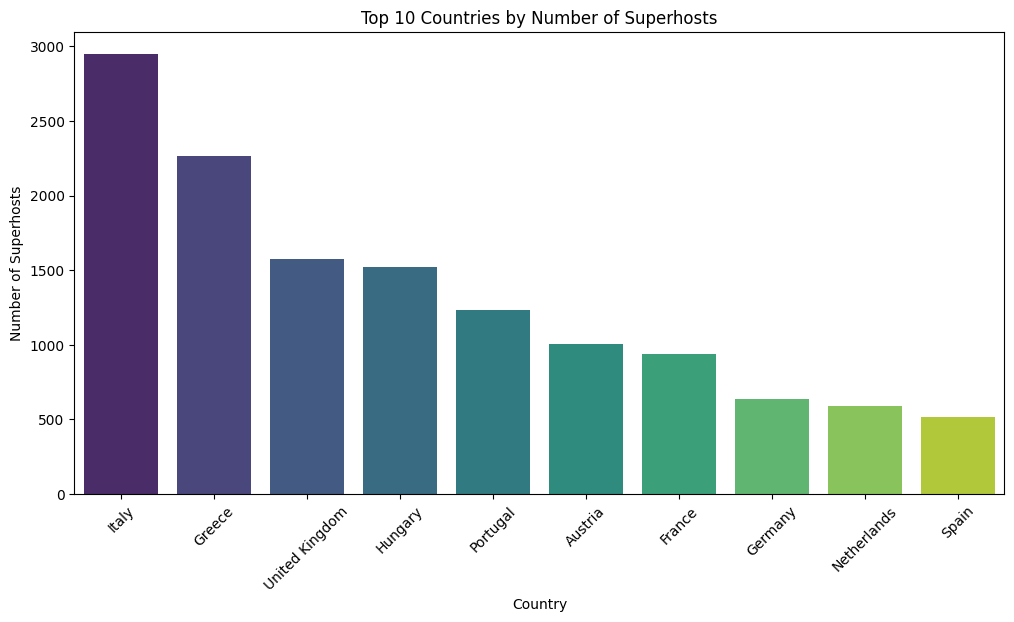

In [ ]:
superhosts = df[df['host_is_superhost'] == True]

superhost_count = superhosts.groupby('Country')['ID'].count().sort_values(ascending=False)
superhost_count.head(10)

top_countries = superhost_count.head(10)
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_countries.index,
    y=top_countries.values,
    palette='viridis'
)
plt.xticks(rotation=45)
plt.ylabel("Number of Superhosts")
plt.title("Top 10 Countries by Number of Superhosts")
plt.show()


# ML

In [ ]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pickle
from tqdm import tqdm



In [ ]:
df['realSum'] = df['realSum'].apply(lambda x: Upper if x > Upper else (Lower if x < Lower else x))

In [ ]:
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    lb = LabelEncoder()
    df[col] = lb.fit_transform(df[col])

In [ ]:
object_cols = df.select_dtypes(include='category').columns

for col in object_cols:
    lb = LabelEncoder()
    df[col] = lb.fit_transform(df[col])

In [ ]:
X, y = df.drop(columns=['host_is_superhost']), df['host_is_superhost']

In [ ]:
y.head()

0    False
1    False
2    False
3    False
4     True
Name: host_is_superhost, dtype: bool

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    # 'SVC': SVC(),
    'NB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier()
}
model_loss = {}

  0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



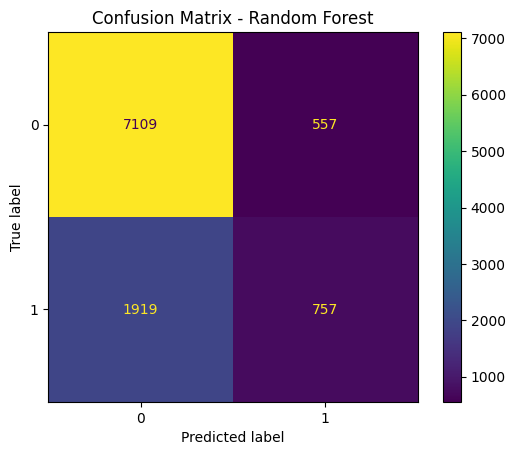

 20%|██        | 1/5 [00:02<00:08,  2.13s/it]

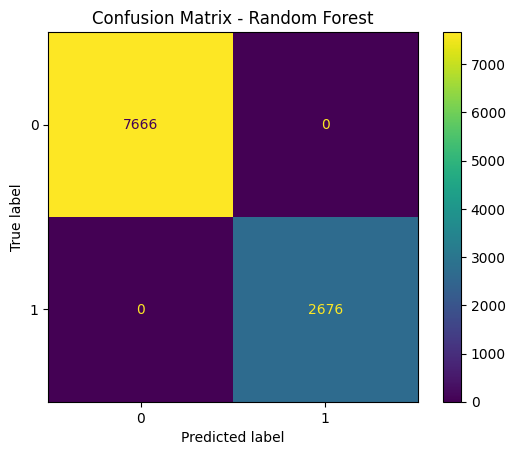

 40%|████      | 2/5 [00:02<00:03,  1.08s/it]

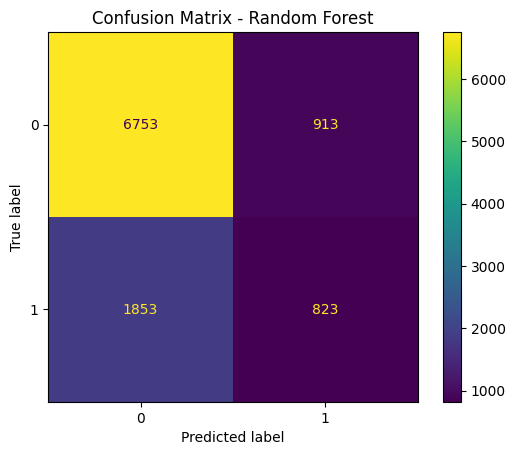

 60%|██████    | 3/5 [00:22<00:19,  9.80s/it]

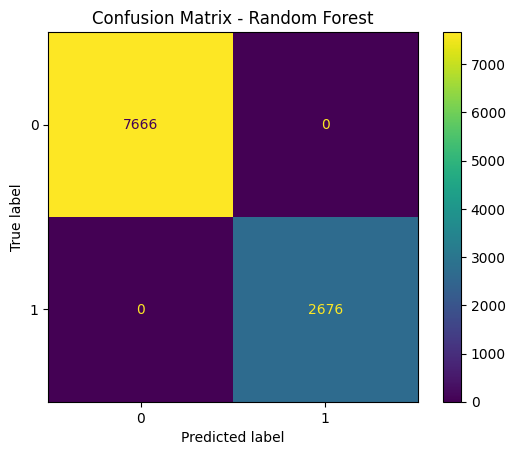

 80%|████████  | 4/5 [00:23<00:06,  6.10s/it]

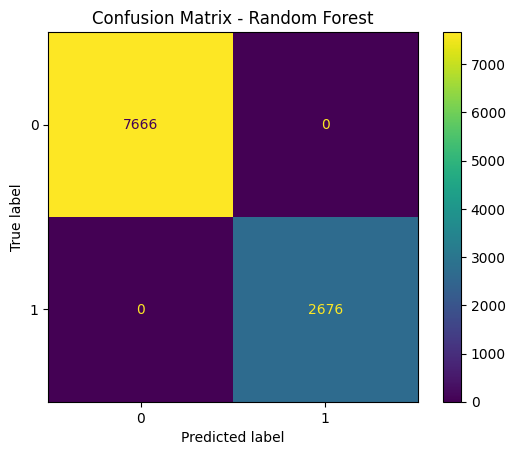

100%|██████████| 5/5 [00:34<00:00,  6.81s/it]


In [ ]:
for model_name, model in tqdm(models.items()):

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    model_loss[model_name]=[
        accuracy_score(y_train,y_pred_train),
        accuracy_score(y_test,y_pred_test),

        precision_score(y_train,y_pred_train,average="weighted"),
        precision_score(y_test,y_pred_test,average="weighted"),

        recall_score(y_train,y_pred_train,average="weighted"),
        recall_score(y_test,y_pred_test,average="weighted"),

        f1_score(y_train,y_pred_train,average="weighted"),
        f1_score(y_test,y_pred_test,average="weighted"),
    ]
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title("Confusion Matrix - Random Forest")
    plt.show()

In [ ]:
pd.DataFrame(model_loss,index=['Traivn_Accuracy','Test_Accuracy','Train_precision_score','Test_precision_score','Train_recall_score','Test_recall_score','Train_f1_score','Test_f1_score']).T


Traivn_Accuracy  Test_Accuracy  Train_precision_score  \
LogisticRegression         0.758516       0.760588               0.728026   
NB                         0.999976       1.000000               0.999976   
KNN                        0.816366       0.732547               0.805479   
DT                         1.000000       1.000000               1.000000   
RF                         1.000000       1.000000               1.000000   

                    Test_precision_score  Train_recall_score  \
LogisticRegression              0.732756            0.758516   
NB                              1.000000            0.999976   
KNN                             0.704315            0.816366   
DT                              1.000000            1.000000   
RF                              1.000000            1.000000   

                    Test_recall_score  Train_f1_score  Test_f1_score  
LogisticRegression           0.760588        0.726373       0.729492  
NB                           1.000000        0.999976       1.000000  
KNN                          0.732547        0.803455       0.711781  
DT                           1.000000        1.000000       1.000000  
RF                           1.000000        1.000000       1.000000

<Axes: >

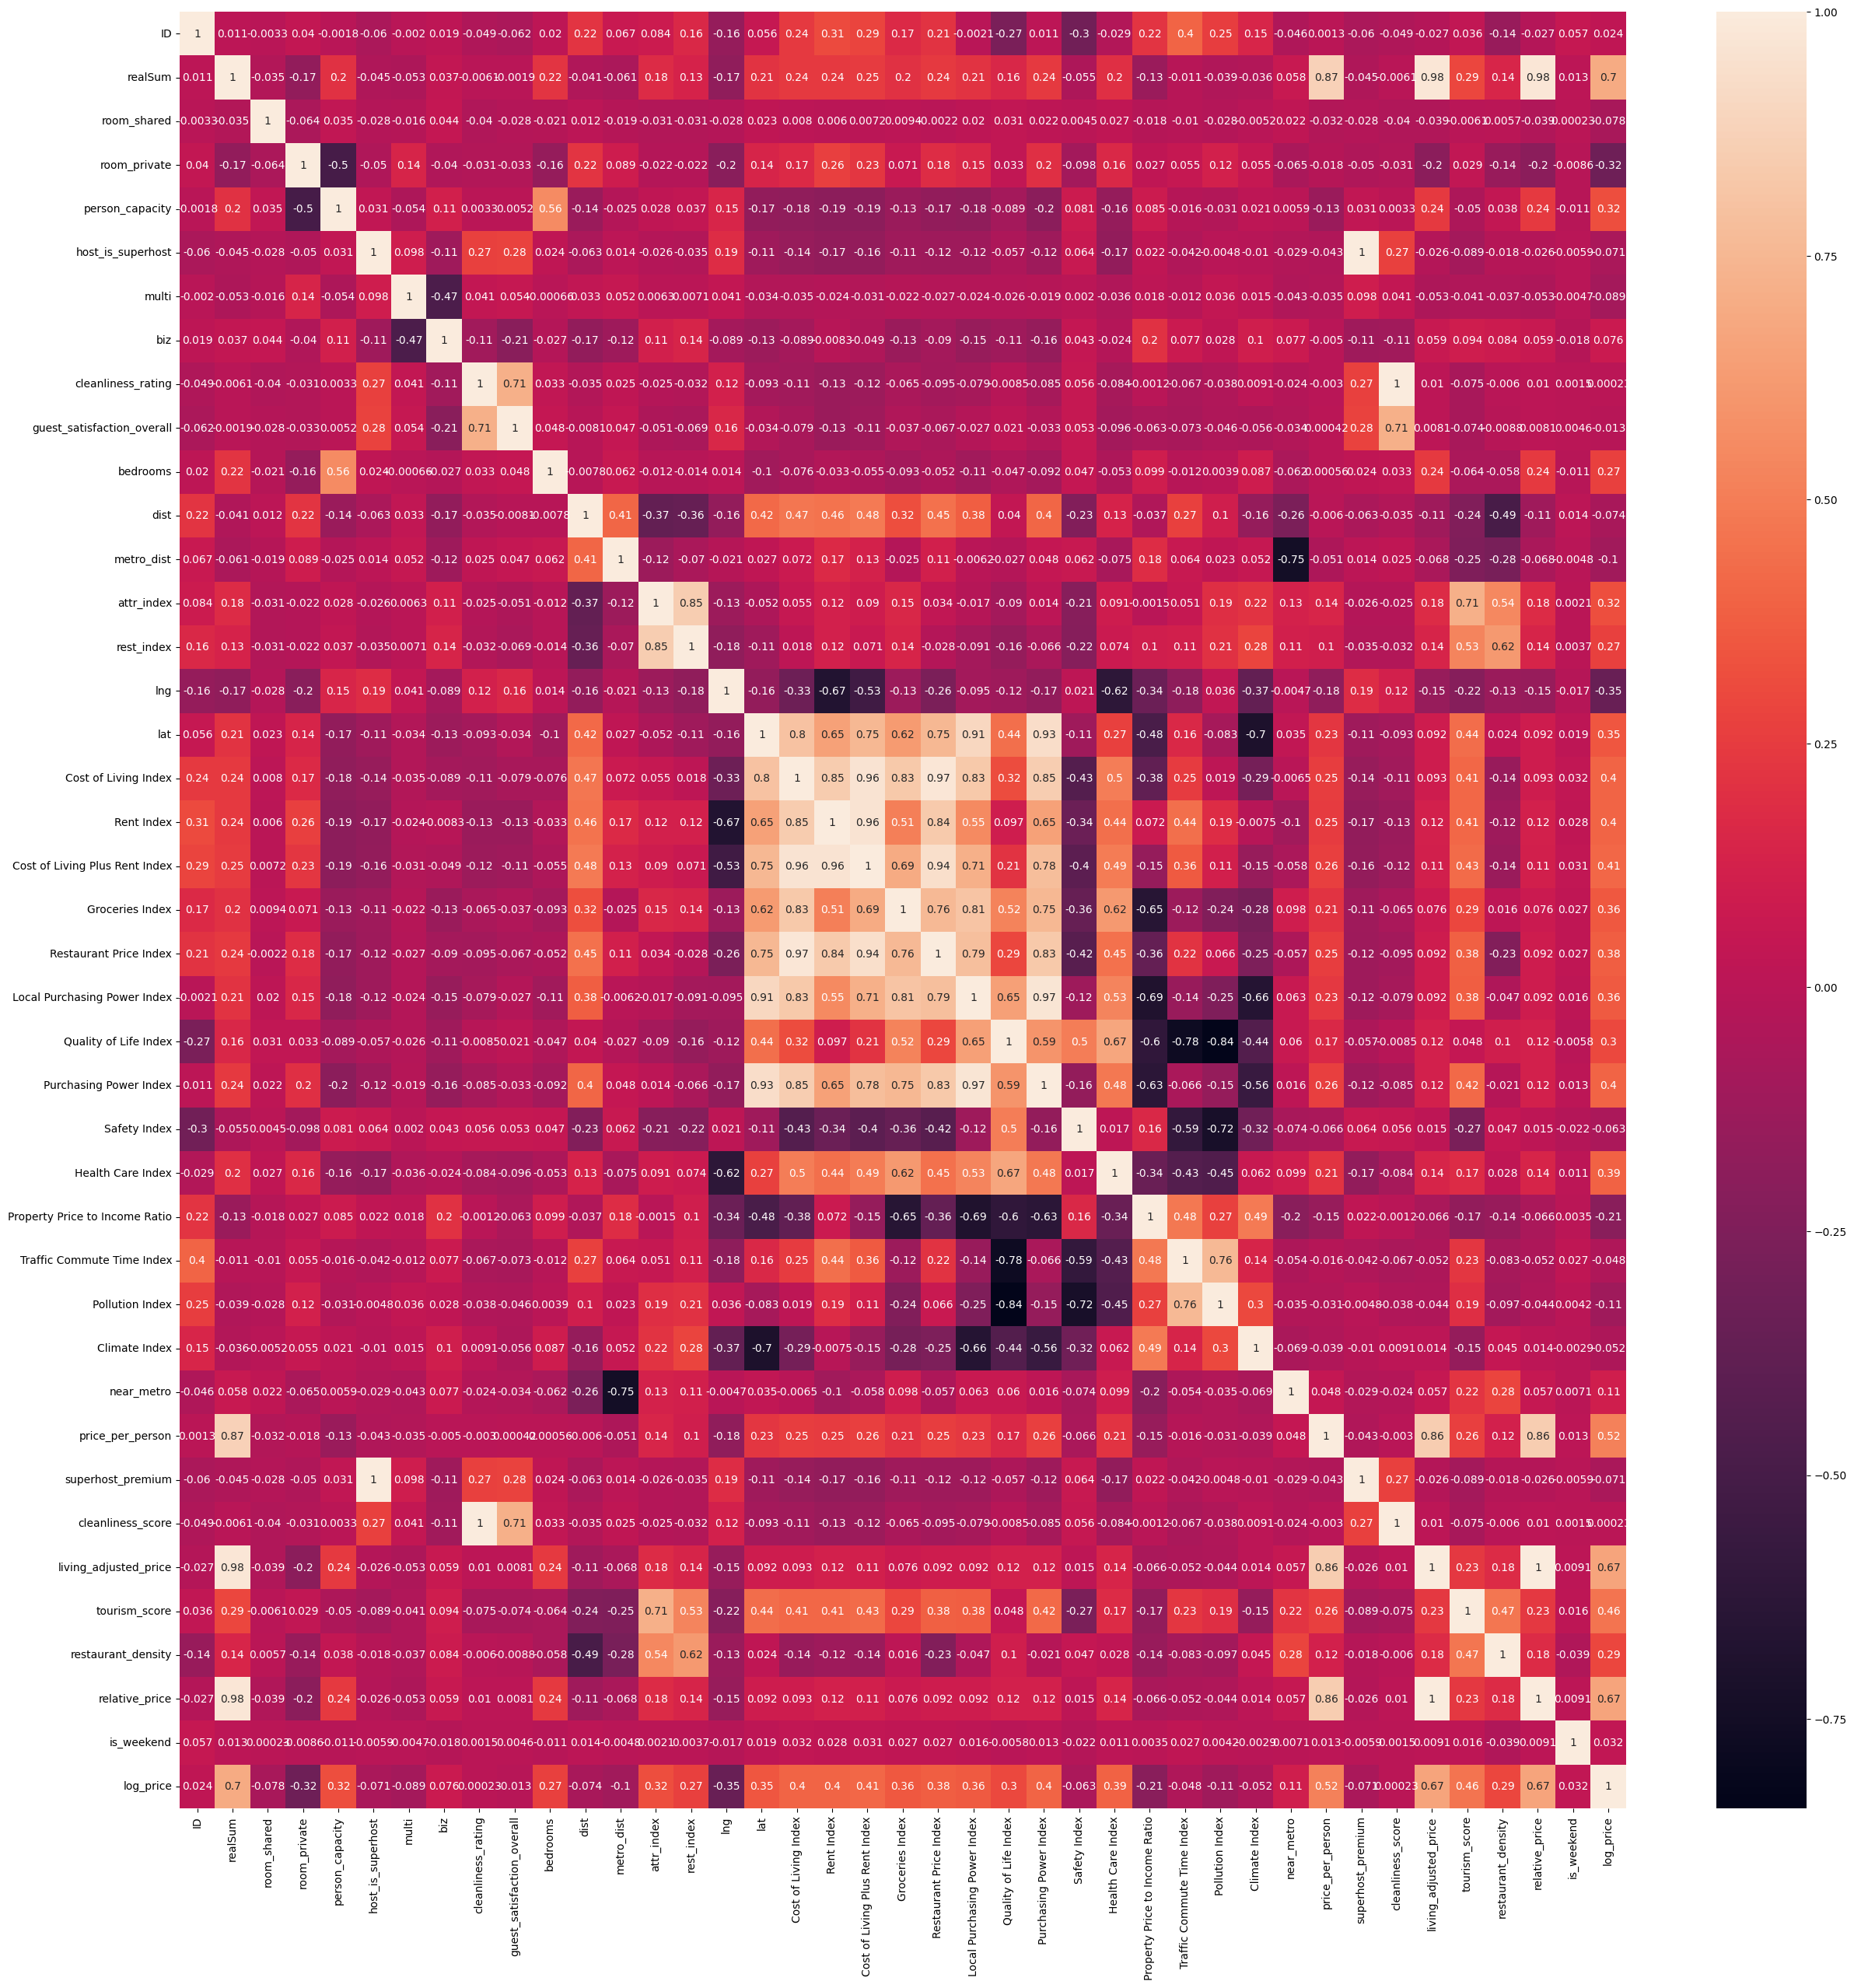